<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part6_P187.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 178 (delta 3), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (178/178), 6.64 MiB | 19.95 MiB/s, done.
Resolving deltas: 100% (89/89), done.


'/content/data'

# 이항 로지스틱 회귀

In [6]:
# 이항 로지스틱 회귀
import numpy as np
import pandas as pd

body = pd.read_csv('/content/data/bodyPerformance.csv')
display(body.head())
display(body.info())
print(body['class'].value_counts())  # A, B, C, D

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


None

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64


In [8]:
# 범주형 변수 변환
# ['gender'] : 남자면 0, 여자면 1
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
# ['class_1'] : ['class']에서 A인 경우 1, 나머지는 0
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
display(body.head())

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [9]:
# 데이터 분할
from sklearn.model_selection import train_test_split

# 특정 열 제외 : ['class', 'class_1']
feature_columns = list(body.columns.difference(['class', 'class_1']))
x = body[feature_columns]
y = body['class_1']

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(9375, 11) (9375,) (4018, 11) (4018,)


In [10]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=45)
logR.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=45)

In [12]:
proba = pd.DataFrame(logR.predict_proba(train_x))
cs = logR.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis = 1 )
df.columns=['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

display(df)

,Not A,A,decision_function
0,1.000000,7.081977e-08,-16.463128
1,1.000000,1.291157e-07,-15.862557
2,1.000000,2.789216e-07,-15.092335
3,1.000000,2.904239e-07,-15.051924
4,1.000000,2.963078e-07,-15.031867
...,...,...,...
9370,0.004690,9.953104e-01,5.357705
9371,0.004474,9.955261e-01,5.405006
9372,0.003677,9.963235e-01,5.602099
9373,0.002044,9.979560e-01,6.190822


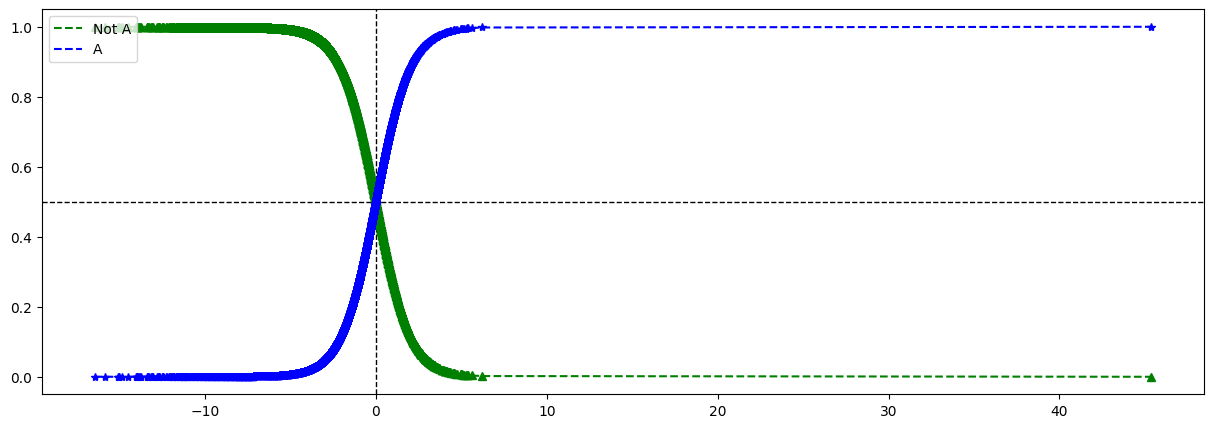

In [15]:
# Confidence Score에 따른 클래스 확률값을 매칭시켜 A클래스에 속할 추정확률과 결정경계(파란선) 구하기
# 뭔말이야?
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [17]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))   # 정확도	84.67%
print('정밀도\t{}%'.format(round(test_prc*100, 2)))   # 정밀도	71.8%
print('재현율\t{}%'.format(round(test_rcll*100, 2)))  # 재현율	63.65%
print('F1\t{}%'.format(round(test_f1*100, 2)))        # F1	67.48%

[[2763  251]
 [ 365  639]]


정확도	84.67%
정밀도	71.8%
재현율	63.65%
F1	67.48%


# 다항 로지스틱 회귀

In [19]:
import numpy as np
import pandas as pd

body = pd.read_csv('/content/data/bodyPerformance.csv')
display(body.head())
display(body.info())
print(body['class'].value_counts())  # A, B, C, D

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64


In [20]:
# 범주형 변수 변환
# ['gender'] : 남자면 0, 여자면 1
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
# ['class'] : A=0, B=1, C=2, D=3
body['class_2'] = body['class'].map({
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3
})
display(body.head())

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1


In [21]:
# 데이터 분할
from sklearn.model_selection import train_test_split

# 특정 열 제외 : ['class', 'class_1']
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(9375, 11) (9375,) (4018, 11) (4018,)


In [27]:
# 모델 적용
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class='multinomial',
                           solver='lbfgs', # 최적화 알고리즘 : saga, newton-cg도 있음
                           C=10,  # 규제(regularization)의 역수
                                  # (0.1, 0.01) : 규제 강함
                                  # (10, 100) : 규제 약함
                           max_iter=1000,    # 반복횟수 : default=100
                           random_state = 45)
softm.fit(train_x, train_y)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=45)

In [28]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))

[[720 253  31   0]
 [251 434 289  30]
 [ 78 214 528 185]
 [ 11  60 153 781]]


정확도	61.3%


In [40]:
display(test_x.head(5))
display(test_y.head(5))


# test_x 첫번째 다섯행 행이 각 클래스에 속할 확률
# softm.predict_proba([test_x.loc[test_x.index[0], :]])
softm.predict_proba(test_x.loc[test_x.index[:5], :])


,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
2765,59.0,22.9,187.0,82.0,0,38.8,172.8,17.3,40.0,117.0,76.3
7197,22.0,27.2,144.0,92.0,1,19.9,160.3,27.4,38.0,132.0,49.5
4617,30.0,32.2,178.0,81.0,1,33.3,158.9,15.2,27.0,120.0,60.4
11614,42.0,29.6,142.0,83.0,1,30.9,162.1,14.9,28.0,123.0,56.3
5924,22.0,22.6,205.0,82.0,0,48.5,167.0,17.0,48.0,132.0,71.0


,class_2
2765,2
7197,1
4617,1
11614,2
5924,2


array([[0.1584068 , 0.49250466, 0.30796142, 0.04112712],
       [0.25603104, 0.40908081, 0.31562967, 0.01925848],
       [0.04025197, 0.19582632, 0.35056785, 0.41335385],
       [0.06268583, 0.2966559 , 0.4623466 , 0.17831167],
       [0.15332424, 0.40781511, 0.36573361, 0.07312704]])